## Data 

### Sales of summer clothes in E-commerce Wish

https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/summer-products-with-rating-and-performance_2020-08.csv")
data.head()

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   
2            EUR         100               0    3.57            14   
3            EUR        5000               1    4.03           579   
4            EUR         100               1    3.10            20   

   rating_five_count  ...  merchant_rating_count  merchant_rating  \
0               26.0  ...                    568         4.128521   
1             2269.0  ...                  17752         3.899673   
2                5.0  ...                    295         3.989831   
3              295.0  ...                  23832         4.020435   
4                6.0  ...                  14482         4.001588   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   
2  5d464a1ffdf7bc44ee933c65                             0   
3  58cfdefdacb37b556efdff7c                             0   
4  5ab3b592c3911a095ad5dadb                             0   

   merchant_profile_picture                                      product_url  \
0                       NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                       NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   
2                       NaN  https://www.wish.com/c/5ea10e2c617580260d55310a   
3                       NaN  https://www.wish.com/c/5cedf17ad1d44c52c59e4aca   
4                       NaN  https://www.wish.com/c/5ebf5819ebac372b070b0e70   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   
2  https://contestimg.wish.com/api/webimage/5ea10...   
3  https://contestimg.wish.com/api/webimage/5cedf...   
4  https://contestimg.wish.com/api/webimage/5ebf5...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08  
2  5ea10e2c617580260d55310a  summer     2020-08  
3  5cedf17ad1d44c52c59e4aca  summer     2020-08  
4  5ebf5819ebac372b070b0e70  summer     2020-08  

[5 rows x 43 columns]

In [3]:
data['price'].describe()

count    1573.000000
mean        8.325372
std         3.932030
min         1.000000
25%         5.810000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

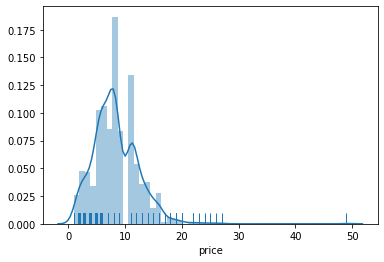

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.distplot(data['price'],rug=True)

## Train-test split

In [5]:
data = data.drop(['crawl_month','product_id','product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id', 'currency_buyer'], axis = 1)
data = data.drop(['theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle'], axis = 1)
data = data.drop(['title','title_orig','tags'], axis = 1)
data = data.drop(['shipping_option_name'], axis = 1)
data = data.drop(['rating_count'], axis = 1)
data.head().T

0        1             2        3        4
price                              16        8             8        8     2.72
retail_price                       14       22            43        8        3
units_sold                        100    20000           100     5000      100
uses_ad_boosts                      0        1             0        1        1
rating                           3.76     3.45          3.57     4.03      3.1
rating_five_count                  26     2269             5      295        6
rating_four_count                   8     1027             4      119        4
rating_three_count                 10     1118             2       87        2
rating_two_count                    1      644             0       42        2
rating_one_count                    9     1077             3       36        6
badges_count                        0        0             0        0        0
badge_local_product                 0        0             0        0        0
badge_product_quality               0        0             0        0        0
badge_fast_shipping                 0        0             0        0        0
product_color                   white    green  leopardprint    black   yellow
product_variation_size_id           M       XS            XS        M        S
product_variation_inventory        50       50             1       50        1
shipping_option_price               4        2             3        2        1
shipping_is_express                 0        0             0        0        0
countries_shipped_to               34       41            36       41       35
inventory_total                    50       50            50       50       50
has_urgency_banner                  1        1             1      NaN        1
origin_country                     CN       CN            CN       CN       CN
merchant_rating_count             568    17752           295    23832    14482
merchant_rating               4.12852  3.89967       3.98983  4.02043  4.00159
merchant_has_profile_picture        0        0             0        0        0

In [6]:
data.dtypes.T

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
origin_country                   object
merchant_rating_count             int64
merchant_rating                 float64


In [7]:
data.isnull().sum()

price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
origin_country                    17
merchant_rating_count              0
merchant_rating                    0
merchant_has_profile_picture       0
dtype: int64

In [8]:
data = data.fillna(0)

In [9]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [10]:
transformer = ColumnTransformer([
    ('product_color', OneHotEncoder(drop="first",sparse=False), ['product_color']),
    ('product_variation_size_id', OneHotEncoder(drop="first",sparse=False), ['product_variation_size_id']),
    ('origin_country', OneHotEncoder(drop="first",sparse=False), ['origin_country'])])

data = pd.get_dummies(data, columns=['product_color', 'product_variation_size_id','origin_country'])

In [11]:
data.head()

price  retail_price  units_sold  uses_ad_boosts  rating  rating_five_count  \
0  16.00            14         100               0    3.76               26.0   
1   8.00            22       20000               1    3.45             2269.0   
2   8.00            43         100               0    3.57                5.0   
3   8.00             8        5000               1    4.03              295.0   
4   2.72             3         100               1    3.10                6.0   

   rating_four_count  rating_three_count  rating_two_count  rating_one_count  \
0                8.0                10.0               1.0               9.0   
1             1027.0              1118.0             644.0            1077.0   
2                4.0                 2.0               0.0               3.0   
3              119.0                87.0              42.0              36.0   
4                4.0                 2.0               2.0               6.0   

   ...  product_variation_size_id_pants-S  product_variation_size_id_s  \
0  ...                                  0                            0   
1  ...                                  0                            0   
2  ...                                  0                            0   
3  ...                                  0                            0   
4  ...                                  0                            0   

   product_variation_size_id_size S  origin_country_0  origin_country_AT  \
0                                 0                 0                  0   
1                                 0                 0                  0   
2                                 0                 0                  0   
3                                 0                 0                  0   
4                                 0                 0                  0   

   origin_country_CN  origin_country_GB  origin_country_SG  origin_country_US  \
0                  1                  0                  0                  0   
1                  1                  0                  0                  0   
2                  1                  0                  0                  0   
3                  1                  0                  0                  0   
4                  1                  0                  0                  0   

   origin_country_VE  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 239 columns]

In [12]:
data = data.drop(['has_urgency_banner'], axis = 1)

In [13]:
data.isnull().sum()

price                0
retail_price         0
units_sold           0
uses_ad_boosts       0
rating               0
                    ..
origin_country_CN    0
origin_country_GB    0
origin_country_SG    0
origin_country_US    0
origin_country_VE    0
Length: 238, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(data, test_size=0.2, random_state=42)
valid, test = train_test_split(valid_test, test_size=0.5, random_state=24)

len(train), len(valid), len(test)

(1258, 157, 158)

In [15]:
train_feats = train
valid_feats = valid

In [16]:
train_feats

price  retail_price  units_sold  uses_ad_boosts  rating  \
1041   7.00             9         100               0    3.23   
277   11.00            10       20000               0    3.69   
1223   5.65            10         100               1    2.86   
925   16.00            14         100               0    4.00   
1161   3.00             3        1000               0    3.94   
...     ...           ...         ...             ...     ...   
1130   8.00             7       10000               0    4.13   
1294  11.00            10        5000               0    3.91   
860    8.00            18        1000               1    4.15   
1459  11.00            47         100               0    4.39   
1126   8.00             7       10000               0    4.14   

      rating_five_count  rating_four_count  rating_three_count  \
1041               14.0                6.0                 9.0   
277               985.0              356.0               320.0   
1223                1.0                1.0                 2.0   
925                 5.0                3.0                 2.0   
1161              213.0               88.0                54.0   
...                 ...                ...                 ...   
1130             1260.0              582.0               298.0   
1294              244.0               90.0                67.0   
860                88.0               34.0                18.0   
1459               14.0                7.0                 0.0   
1126             1209.0              449.0               277.0   

      rating_two_count  rating_one_count  ...  \
1041               4.0              10.0  ...   
277              156.0             343.0  ...   
1223               2.0               1.0  ...   
925                0.0               1.0  ...   
1161              29.0              42.0  ...   
...                ...               ...  ...   
1130             116.0             140.0  ...   
1294              36.0              50.0  ...   
860                7.0              11.0  ...   
1459               1.0               1.0  ...   
1126             115.0             132.0  ...   

      product_variation_size_id_pants-S  product_variation_size_id_s  \
1041                                  0                            0   
277                                   0                            0   
1223                                  0                            0   
925                                   0                            0   
1161                                  0                            0   
...                                 ...                          ...   
1130                                  0                            0   
1294                                  0                            0   
860                                   0                            0   
1459                                  0                            0   
1126                                  0                            0   

      product_variation_size_id_size S  origin_country_0  origin_country_AT  \
1041                                 0                 0                  0   
277                                  0                 0                  0   
1223                                 0                 0                  0   
925                                  1                 0                  0   
1161                                 0                 0                  0   
...                                ...               ...                ...   
1130                                 0                 0                  0   
1294                                 0                 0                  0   
860                                  0                 0                  0   
1459                                 0                 0                  0   
1126                                 0                 0                  0   

      origin_country_CN  orig

In [17]:
train_feats.head()['price']

1041     7.00
277     11.00
1223     5.65
925     16.00
1161     3.00
Name: price, dtype: float64

## Weights Analysis & Weight Plot

In [18]:
from statsmodels.api import OLS

In [19]:
def get_xs_ys(df, y_col):
    xs = df.drop(columns=y_col)
    xs['bias'] = 1
    ys = df[y_col]
    return xs,ys

In [20]:
train_xs, train_ys = get_xs_ys(train_feats, 'price')
valid_xs, valid_ys = get_xs_ys(valid_feats, 'price')

In [21]:
train_xs.head().T

1041      277     1223   925      1161
retail_price         9.00     10.00   10.00   14.0     3.00
units_sold         100.00  20000.00  100.00  100.0  1000.00
uses_ad_boosts       0.00      0.00    1.00    0.0     0.00
rating               3.23      3.69    2.86    4.0     3.94
rating_five_count   14.00    985.00    1.00    5.0   213.00
...                   ...       ...     ...    ...      ...
origin_country_GB    0.00      0.00    0.00    0.0     0.00
origin_country_SG    0.00      0.00    0.00    0.0     0.00
origin_country_US    0.00      0.00    0.00    0.0     0.00
origin_country_VE    0.00      0.00    0.00    0.0     0.00
bias                 1.00      1.00    1.00    1.0     1.00

[238 rows x 5 columns]

In [22]:
ols = OLS(train_ys, train_xs, hasconst=True)
res = ols.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
=========================================================================================================
Model:                           OLS                           Adj. R-squared:                  0.810    
Dependent Variable:              price                         AIC:                             5146.2397
Date:                            2020-09-17 13:04              BIC:                             6235.3427
No. Observations:                1258                          Log-Likelihood:                  -2361.1  
Df Model:                        211                           F-statistic:                     26.39    
Df Residuals:                    1046                          Prob (F-statistic):              4.40e-306
R-squared:                       0.842                         Scale:                           3.0055   
---------------------------------------------------------------------------------------------------------
                                                        Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
---------------------------------------------------------------------------------------------------------
retail_price                                             0.0101   0.0019  5.2394 0.0000   0.0063   0.0139
units_sold                                              -0.0000   0.0000 -0.2147 0.8300  -0.0000   0.0000
uses_ad_boosts                                          -0.0991   0.1131 -0.8765 0.3810  -0.3211   0.1228
rating                                                   0.0083   0.1126  0.0738 0.9412  -0.2127   0.2293
rating_five_count                                       -0.0003   0.0004 -0.6620 0.5081  -0.0010   0.0005
rating_four_count                                        0.0020   0.0017  1.1421 0.2537  -0.0014   0.0053
rating_three_count                                      -0.0027   0.0029 -0.9293 0.3529  -0.0083   0.0030
rating_two_count                                        -0.0004   0.0054 -0.0816 0.9350  -0.0110   0.0101
rating_one_count                                         0.0019   0.0017  1.0711 0.2844  -0.0015   0.0052
badges_count                                            -0.2828   0.2629 -1.0755 0.2824  -0.7987   0.2331
badge_local_product                                      1.2672   0.4128  3.0696 0.0022   0.4571   2.0772
badge_product_quality                                    0.1806   0.3054  0.5914 0.5544  -0.4186   0.7798
badge_fast_shipping                                     -1.7306   0.6983 -2.4783 0.0134  -3.1007  -0.3604
product_variation_inventory                              0.0067   0.0032  2.1306 0.0334   0.0005   0.0129
shipping_option_price                                    3.1591   0.0676 46.7178 0.0000   3.0264   3.2918
shipping_is_express                                    -14.5074   1.6897 -8.5857 0.0000 -17.8230 -11.1917
countries_shipped_to                                    -0.0005   0.0031 -0.1677 0.8669  -0.0066   0.0056
inventory_total                                         -0.0294   0.0267 -1.1007 0.2713  -0.0817   0.0230
merchant_rating_count                                   -0.0000   0.0000 -0.4010 0.6885  -0.0000   0.0000
merchant_rating                                         -0.0606   0.3087 -0.1962 0.8445  -0.6663   0.5452
merchant_has_profile_picture                             0.0817   0.1652  0.4944 0.6211  -0.2424   0.4058
product_color_0                                         -0.3401   0.4445 -0.7650 0.4444  -1.2123   0.5322
product_color_Army green                                -0.8871   1.7483 -0.5074 0.6120  -4.3178   2.5435
product_color_Black                                      1.6116   1.2360  1.3039 0.1926  -0.8137   4.0369
product_color_Blue                                      -1.9771   1.7296 -1.1431 0.2533  -5.3710   1.4169
product_color_Pink                                      -0.0000   

In [23]:
def rmse(preds, targets):
    return ((preds - targets) ** 2).mean()**0.5

In [24]:
rmse(res.predict(valid_xs), valid_ys)

1.7712011907927085

In [25]:
from talent_academy.linear_models.interpretability import weight_plot, effect_plot, effect_plot_for_example

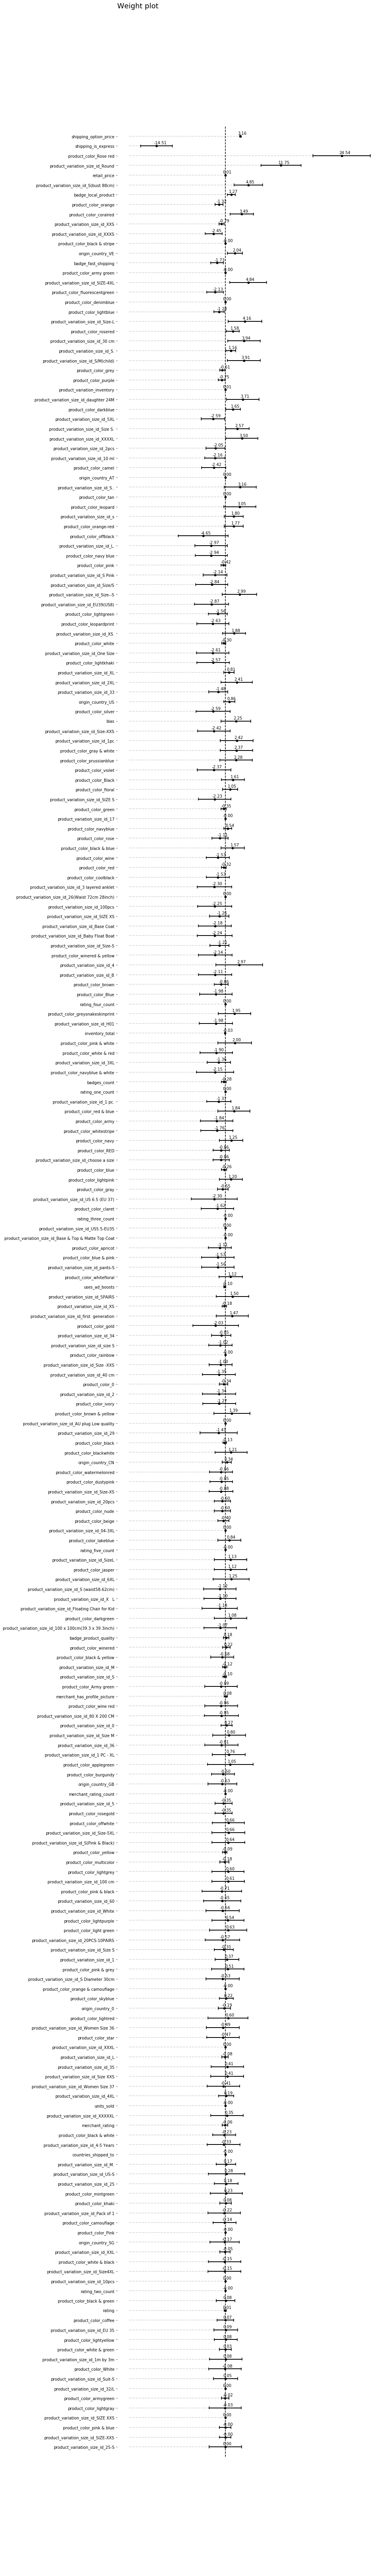

In [26]:
weight_plot(res)

In [27]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(train_xs, train_ys)

rmse(reg.predict(valid_xs), valid_ys)

1.5716074604958163

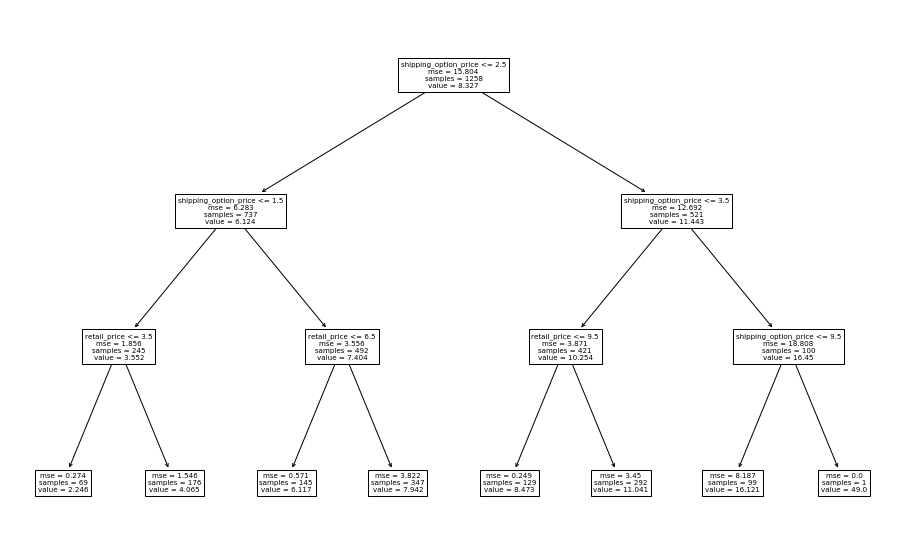

In [28]:
_, ax = plt.subplots(figsize=(16,10))
plot_tree(reg, ax= ax,feature_names=train_xs.columns);